## Random Forest

Random Forest
-Random Forest is ensemble learning method - it combine multiple model to create a stronger, more accurate predictor

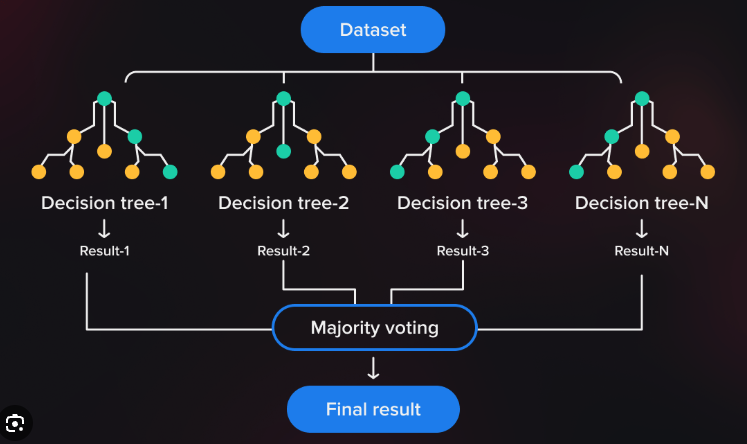

# Advantage of Random Forest
- High Accuracy
- Handle missing values well
- Cand model non-linear relationship

- Work well with large datasets

In [1]:
# Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
pd.set_option('mode.chained_assignment', None)

In [2]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

In [3]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Split
y_pred = model.predict(X_test)

In [6]:
# Evalaute
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

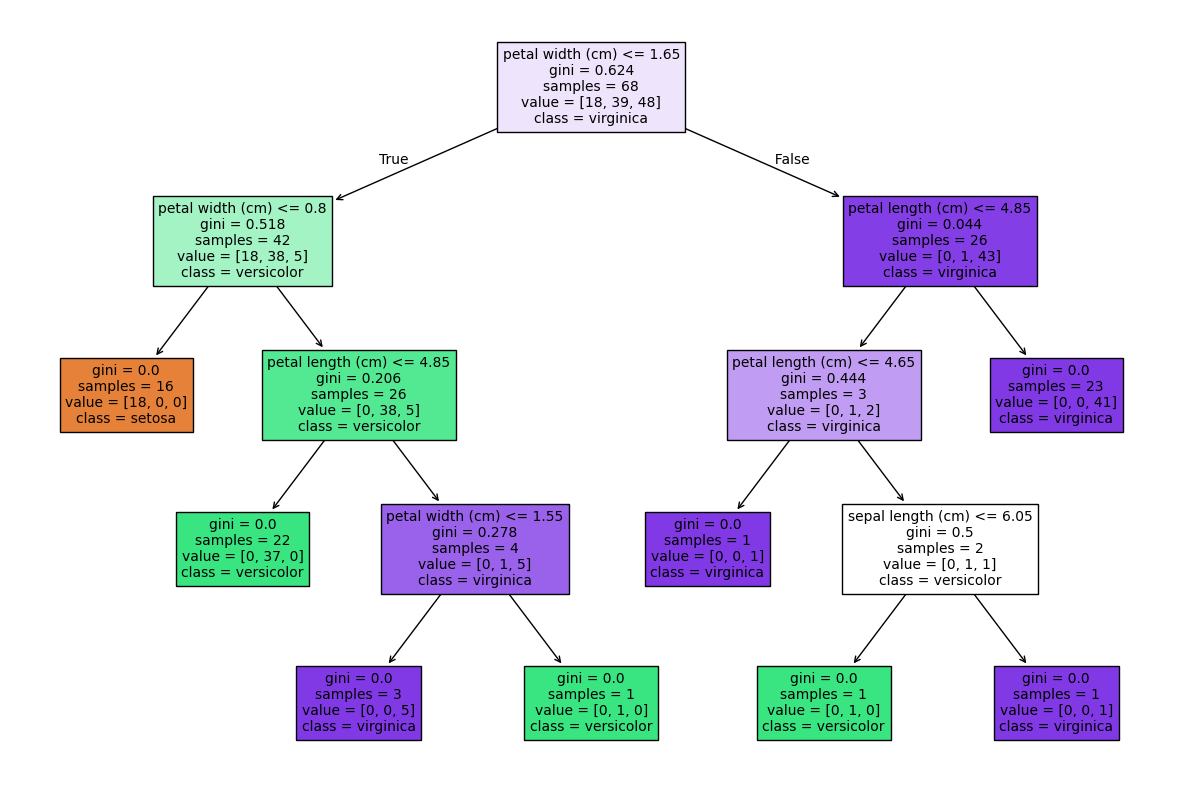

In [7]:
# Visualize

fig, ax = plt.subplots(figsize= (15,10))
tree.plot_tree(model.estimators_[0], filled = True, feature_names=features,class_names=target_names, fontsize=10)
plt.show()

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder




In [9]:
# Load a real-world dataset (e.g., house prices)
from sklearn.datasets import fetch_openml

# Fetch the dataset
house_data = fetch_openml(name='house_prices', version=1, parser='auto')
X = house_data.data
y = house_data.target

# Checking the first few rows of the dataset
# print(X.head())



In [10]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
# Identifying categorical columns (usually of dtype 'object')
categorical_columns = X.select_dtypes(include=['object']).columns
# print(f"Categorical columns: {categorical_columns}")

# Converting categorical columns to numeric using LabelEncoder
label_encoders = {}  # Dictionary to store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Converting to string and applying encoding
    label_encoders[col] = le

# Checking if there are any missing values in the data
# print("Checking for missing values...")
# print(X.isnull().sum())

# If there are missing values, we can either drop or impute them
X = X.fillna(X.mean())  # Filling missing values with the mean of each column



In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [13]:

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $17613.30
